In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

In [ ]:
df = pd.read_csv('supermarket_sales.csv')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Filtering

Pertanyaan :

1. apa saja produk yang memiliki gross income (Pendapatan Kotor) diatas rata-rata yang berada dikota yangon?


In [ ]:
mean_gross_income = df['gross income'].mean()
mean_gross_income

15.379368999999999

In [ ]:
#Filter gross income diatas rata-rata yang berada dikota yangon
df_filtered = df[(df['gross income'] > mean_gross_income) & (df['City'] == 'Yangon')]
df_filtered.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


Insight:

- Rata-rata pendapatan kotor atau gross income di kota yangon yaitu 15.379368999999999
- Kemudian dapat dilihat pada tabel diatas yang menunjukan transaksi produk yang memiliki pendapatan kotor diatas rata-rata di kota yangon.

#Sorting
Pertanyaan:

1. transaksi mana yang memiliki harga perunit(Unit Price) terendah ?


In [ ]:
sorted_data_lowest_rating = df.sort_values(by='Unit price', ascending=True)
sorted_data_lowest_rating.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
944,333-23-2632,A,Yangon,Member,Male,Health and beauty,10.08,7,3.5280,74.0880,3/28/2019,20:14,Cash,70.56,4.761905,3.5280,4.2
572,239-48-4278,A,Yangon,Member,Male,Food and beverages,10.13,7,3.5455,74.4555,3/10/2019,19:35,Ewallet,70.91,4.761905,3.5455,8.3
784,516-77-6464,C,Naypyitaw,Member,Female,Health and beauty,10.16,5,2.5400,53.3400,2/24/2019,13:08,Ewallet,50.80,4.761905,2.5400,4.1
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2/7/2019,14:15,Cash,10.17,4.761905,0.5085,5.9
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.0720,85.5120,3/30/2019,12:51,Credit card,81.44,4.761905,4.0720,9.5


Insight:

Transaksi yang memiliki harga unit terendah dengan Unit Price sejumlah **10.08**,

Dengan :

Invoice ID : 333-23-2632\
Branch : A   
City : Yangon\
Unit : 10.08\
Tax 5% : 3.5280\
Total : 74.0880

#Grouping

Pertanyaan:
1. kota mana yang memiliki jumlah penjualan produk terbanyak/tertinggi ?


In [ ]:
df_grouped = df.groupby('City')['Quantity'].sum().reset_index()
df_grouped

,City,Quantity
0,Mandalay,1820
1,Naypyitaw,1831
2,Yangon,1859


Insight:

Kota yang memiliki jumlah penjualan produk terbanyak ada pada kota **Mandalay** sejumlah **1820**

#Join/Marging


Pertanyaan:
1. Menggabungkan dataframe supermarket_sales dengan dataframe detail_city yang memiliki kolom city dan region.

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df['City'].value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [ ]:
detail_city = pd.DataFrame({
    'City': ['Yangon', 'Mandalay', 'Naypyitaw', 'Bago', 'Magway'],
    'Region' : ['South', 'Central', 'Central', 'South', 'Central']
})
detail_city

,City,Region
0,Yangon,South
1,Mandalay,Central
2,Naypyitaw,Central
3,Bago,South
4,Magway,Central


In [ ]:
#Menggabungkan data penjualan (supermarket_sales) dengan data detail_city
#Mengambil semua baris dari DataFrame kiri (df = dataframe supermarket_sales), dan hanya baris yang cocok dari DataFrame kanan(detail_city)
df_join = pd.merge(df, detail_city, on='City', how='left')

df_join.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Region
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,South
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Central
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,South
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,South
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,South


Insight:

Dapat dilihat pada tabel diatas dimana dataframe **supermarket_sales** menjadi satu dengan dataframe **detail_city** terbukti adanya kolom **region** yang awalnya tidak ada pada dataframe supermarket_sales

#Pivoting
Pertanyaan:

1.  Bagaimana perbandingan jumlah penjualan berdasarkan kategori produk dan customer type di tiap kota/City ?

In [ ]:
# Membuat pivot table yang menunjukkan jumlah penjualan untuk kategori product line dan cutomer type di tiap kota
tabel_pivot = pd.pivot_table(df, values='Quantity', index=['Product line', 'Customer type'], columns='City', aggfunc='sum')
tabel_pivot

City                                  Mandalay  Naypyitaw  Yangon
Product line           Customer type                             
Electronic accessories Member              147        120     162
                       Normal              169        213     160
Fashion accessories    Member              143        163     133
                       Normal              154        179     130
Food and beverages     Member              160        193     153
                       Normal              110        176     160
Health and beauty      Member              172        127     129
                       Normal              148        150     128
Home and lifestyle     Member              137        143     210
                       Normal              158        102     161
Sports and travel      Member              165        151     177
                       Normal              157        114     156

Insight:
- Produk **Electronic Accessories** lebih populer di kota **Naypyitaw**, dengan penjualan yang didominasi oleh pelanggan **Non-member/Normal** sebanyak 213 unit.
- Produk **Fashion Accessories** lebih populer di kota **Naypyitaw**, dengan penjualan yang didominasi oleh pelanggan **Non-member/Normal** sebanyak 179 unit.
- Produk **Food and Beverages** lebih populer di kota **Naypyitaw**, dengan penjualan yang didominasi oleh pelanggan **Member** sebanyak 193 unit.
- Produk **Health and Beauty** lebih populer di kota **Mandalay**, dengan penjualan yang didominasi oleh pelanggan **Member** sebanyak 172 unit.
- Produk **Home and Lifestyle** lebih populer di kota **Yangon**, dengan penjualan yang didominasi oleh pelanggan **Member** sebanyak 210 unit.
- Produk **Sports and Travel** lebih populer di kota **Yangon**, dengan penjualan yang didominasi oleh pelanggan **Member** sebanyak 177 unit.

#Crosstab

Pertanyaan:
1. Metode Pembayaran apa yang paling sering digunakan oleh customer berdasarkan jenis kelamin nya?
2. Metode Pembayaran apa yang paling sering digunakan oleh customer yang berada di kota Naypyitaw?


In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df['Invoice ID'].value_counts()

,count
Invoice ID,
750-67-8428,1
642-61-4706,1
816-72-8853,1
491-38-3499,1
322-02-2271,1
842-29-4695,1
725-67-2480,1
641-51-2661,1
714-02-3114,1


In [ ]:
gender_payment_crosstab = pd.crosstab(df['Gender'], df['Payment'])
gender_payment_crosstab

Payment,Cash,Credit card,Ewallet
Gender,,,
Female,178,163,160
Male,166,148,185


Insight:
Metode pembayaran yang paling sering digunakan yaitu **Ewallet** untuk pria dan **Cash** untuk wanita.

In [ ]:
city_naypyitaw = df[df['City'] == 'Naypyitaw']
city_naypyitaw['Payment'].value_counts()

,count
Payment,
Cash,124
Ewallet,106
Credit card,98


Insight:
Metode pembayaran yang paling sering digunakan oleh customer yang berada di kota Naypyitaw yaitu **Cash**

#Appending
Pertanyaan:

1. Membuat dataframe baru(df1) yang berisi kolom Branch, City dan Total yang kemudian digabungkan dengan dataframe supermarket_sales

In [ ]:
# Data baru:
data1 = {
    'Branch': ['F', 'G', 'H'],
    'City': ['Bago', 'Taunggyi', 'Pyin Oo Lwin'],
    'Total' : [5000,2000,3000]
}

df1 = pd.DataFrame(data1)
df1

,Branch,City,Total
0,F,Bago,5000
1,G,Taunggyi,2000
2,H,Pyin Oo Lwin,3000


In [ ]:
# Menggabungkan data baru ke dataframe asli menggunakan pd.concat
data_appended = pd.concat([df, df1], ignore_index=True)
data_appended.tail()  # Menampilkan data terbaru

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2/22/2019,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/2019,13:28,Cash,618.38,4.761905,30.919,6.6
1000,NaN,F,Bago,NaN,NaN,NaN,NaN,NaN,NaN,5000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,G,Taunggyi,NaN,NaN,NaN,NaN,NaN,NaN,2000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,H,Pyin Oo Lwin,NaN,NaN,NaN,NaN,NaN,NaN,3000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Insight:

Menambahkan data baru pada kolom city (Bago, Tauggyi dan Pyin Oo Lwin) pada dataframe supermarket_sales(df)

#Mengeksplor terkait dengan operasi pada Datetime

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df["Date"] = pd.to_datetime(df["Date"],format="%m/%d/%Y")

###Pertanyaan 1 :

Hari apa yang memiliki penjualan terendah ?

In [ ]:
# Ekstraksi Hari dalam Seminggu
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


In [ ]:
df.groupby("DayOfWeek")["Total"].mean().reset_index().sort_values(by='Total', ascending=True)

,DayOfWeek,Total
1,Monday,303.192624
6,Wednesday,305.812133
0,Friday,316.016838
5,Tuesday,325.836997
4,Thursday,328.617739
3,Sunday,334.269868
2,Saturday,342.200058


Insight:

Hari yang memiliki total penjualan terendah berada di hari **Senin/Monday** dengan total penjualan 303.192624

In [ ]:
df["Month"] = df["Date"].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2


###Pertanyaan 2:

Bulan apa saja yang memiliki total penjualan diatas rata-rata ?

In [ ]:
#Mengganti nilai numerik dengan nama bulan pada kolom Month menggunakan lamda function

month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df["Month"] = df["Month"].apply(lambda x: month_mapping[x])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


In [ ]:
#Menghitung total penjualan per bulan
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
monthly_sales

,Month,Total
0,February,97219.374
1,January,116291.868
2,March,109455.507


In [ ]:
#Menghitung rata-rata total penjualan perbulan
mean_monthly_sales = monthly_sales['Total'].mean()
mean_monthly_sales

107655.583

In [ ]:
#Memfilter bulan dengan total penjualan diatas rata-rata
df_filtered_month_average = monthly_sales[monthly_sales['Total'] > mean_monthly_sales]
df_filtered_month_average.head()

,Month,Total
1,January,116291.868
2,March,109455.507


Insight:

Bulan January dan March merupakan bulan dengan total penjualan diatas rata-rata.

January : 116291.868\
March : 109455.507

###Pertanyaan 3:

Kapan waktu dengan penjualan tertinggi? Pagi, siang, sore atau malam ?


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
def categorize_time(time):
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Pagi'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('15:00:00').time():
        return 'Siang'
    elif time >= pd.to_datetime('15:00:00').time() and time < pd.to_datetime('18:00:00').time():
        return 'Sore'
    else:
        return 'Malam'

In [ ]:
df['Waktu'] = df['Time'].apply(categorize_time)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,Waktu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,Siang
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,Pagi
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,Siang
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,Malam
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,Pagi


In [ ]:
df.groupby("Waktu")["Total"].mean().reset_index().sort_values(by='Total', ascending=False)

,Waktu,Total
2,Siang,333.154576
1,Pagi,323.553982
3,Sore,319.569368
0,Malam,315.656157


Insight:

Ternyata waktu penjualan tertinggi pada **Siang Hari** dengan total 333.154576 disusul dengan pagi sejumlah 323.553982, kemudian sore: 319.569368 dan malam hari : 315.656157.

# 2. Standar Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,Waktu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,Siang
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,Pagi
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,Siang
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,Malam
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,Pagi


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_stdscaller = ['Total', 'Unit price', 'Tax 5%', 'gross income']

# Inisialisasi StandardScaler
scaler = StandardScaler()

In [ ]:
df[['Total_stds', 'Unit price_stds', 'Tax 5%_stds', 'gross income_stds']] = scaler.fit_transform(df[columns_to_stdscaller])

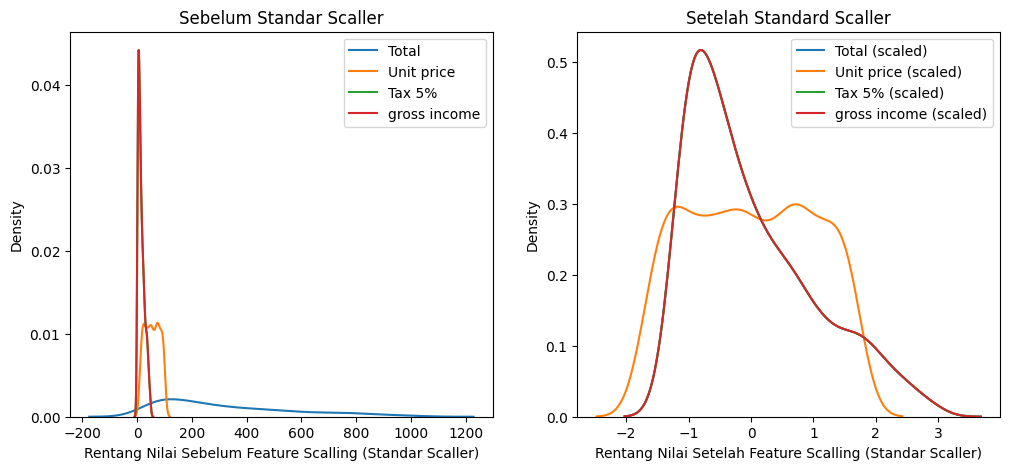

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaller')
sns.kdeplot(df['Total'], ax=ax1, label='Total')
sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')
sns.kdeplot(df['Tax 5%'], ax=ax1, label='Tax 5%')
sns.kdeplot(df['gross income'], ax=ax1, label='gross income')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(df['Total_stds'], ax=ax2, label='Total (scaled)')
sns.kdeplot(df['Unit price_stds'], ax=ax2, label='Unit price (scaled)')
sns.kdeplot(df['Tax 5%_stds'], ax=ax2, label='Tax 5% (scaled)')
sns.kdeplot(df['gross income_stds'], ax=ax2, label='gross income (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

Insight:

Sebelum Scaling (Kiri):
- Distribusi data tidak seragam
- Kolom Total memiliki rentang nilai yang jauh lebih besar dibandingkan kolom lainnya.
- Nilai-nilai dari kolom seperti Tax 5%, Unit price, dan gross income berada dalam rentang yang lebih kecil, menyebabkan distribusi Total mendominasi grafik.

Setelah Scaling (Kanan):
- Semua kolom memiliki mean mendekati 0 dan standar deviasi mendekati 1.
- Distribusi data lebih seragam, sehingga setiap kolom memiliki kontribusi yang setara dalam analisis atau model prediktif.
- Perubahan distribusi:
Kolom seperti gross income dan Unit price tetap mempertahankan pola distribusi aslinya.
Kolom Total, yang awalnya memiliki rentang besar, kini berada dalam skala yang sebanding dengan kolom lainnya.

# 3. MinMax Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_minmax = ['Total', 'Unit price', 'Tax 5%', 'gross income']

# Inisialisasi MinMaxScaler
minmax = MinMaxScaler()

In [ ]:
df[['Total_minmax', 'Unit price_minmax', 'Tax 5%_minmax', 'gross income_minmax']] = minmax.fit_transform(df[columns_to_minmax])

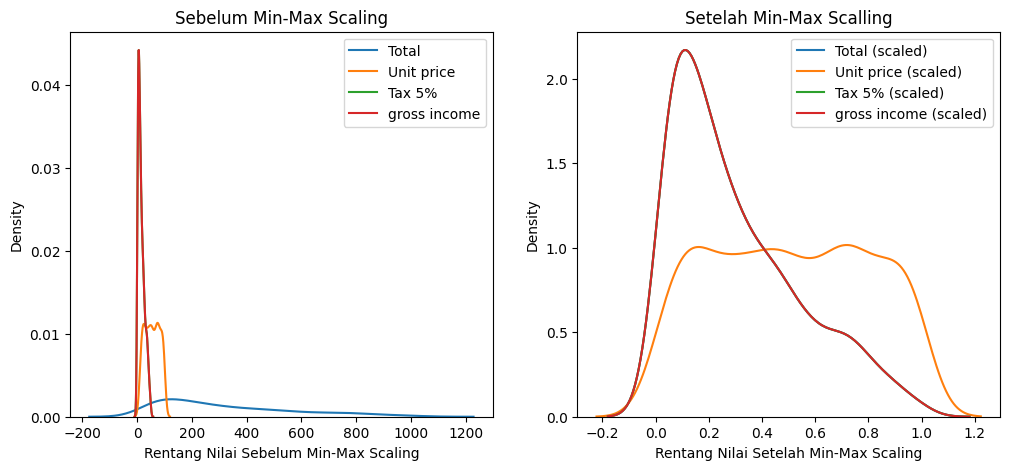

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Min-Max Scaling
ax1.set_title('Sebelum Min-Max Scaling')
sns.kdeplot(df['Total'], ax=ax1, label='Total')
sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')
sns.kdeplot(df['Tax 5%'], ax=ax1, label='Tax 5%')
sns.kdeplot(df['gross income'], ax=ax1, label='gross income')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Min-Max Scalling')
sns.kdeplot(df['Total_minmax'], ax=ax2, label='Total (scaled)')
sns.kdeplot(df['Unit price_minmax'], ax=ax2, label='Unit price (scaled)')
sns.kdeplot(df['Tax 5%_minmax'], ax=ax2, label='Tax 5% (scaled)')
sns.kdeplot(df['gross income_minmax'], ax=ax2, label='gross income (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Min-Max Scaling')
ax2.set_xlabel('Rentang Nilai Setelah Min-Max Scaling')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [ ]:
df[['Total','Total_minmax']].head()

,Total,Total_minmax
0,548.9715,0.521616
1,80.2200,0.067387
2,340.5255,0.319628
3,489.0480,0.463549
4,634.3785,0.604377


In [ ]:
# Checking statistical summary
# After standar scaller process the result has -> min (minimum) = 0 and max (maximum) = 1
df[['Total','Total_minmax']].describe()

,Total,Total_minmax
count,1000.000000,1000.000000
mean,322.966749,0.302613
std,245.885335,0.238268
min,10.678500,0.000000
25%,124.422375,0.110220
50%,253.848000,0.235636
75%,471.350250,0.446400
max,1042.650000,1.000000


Insight:

1. Grafik Sebelum Min-Max Scaling
Distribusi Asli:
  - Total memiliki rentang nilai yang jauh lebih besar dibandingkan kolom lainnya.
  - Unit price, Tax 5%, dan gross income cenderung terkonsentrasi pada nilai yang lebih kecil.

2. Grafik Setelah Min-Max Scaling
  - Perubahan Rentang Nilai: Semua kolom telah diubah menjadi rentang antara 0 hingga 1, seperti yang diharapkan dari Min-Max Scaling.
  - Skala yang seragam ini memastikan bahwa tidak ada kolom yang mendominasi hanya karena memiliki rentang nilai yang lebih besar.
  - Meskipun rentang nilai berubah, bentuk distribusi (density curve) dari setiap kolom tetap sama. Ini menunjukkan bahwa Min-Max Scaling hanya mengubah skala data tanpa memengaruhi pola distribusinya